LLMS: Silma, qwen, Gemini if arabic is applicable (Muilti lingual model), MT5

In [2]:
!pip install contractions

In [3]:
!pip install transformers
!pip install datasets

In [4]:
!pip install emoji

In [5]:
# Install required packages
!!pip install wordcloud
!!pip install imbalanced-learn

['Requirement already satisfied: imbalanced-learn in /usr/local/lib/python3.10/dist-packages (0.13.0)',
 'Requirement already satisfied: numpy<3,>=1.24.3 in /usr/local/lib/python3.10/dist-packages (from imbalanced-learn) (1.26.4)',
 'Requirement already satisfied: scipy<2,>=1.10.1 in /usr/local/lib/python3.10/dist-packages (from imbalanced-learn) (1.13.1)',
 'Requirement already satisfied: scikit-learn<2,>=1.3.2 in /usr/local/lib/python3.10/dist-packages (from imbalanced-learn) (1.6.0)',
 'Requirement already satisfied: sklearn-compat<1,>=0.1 in /usr/local/lib/python3.10/dist-packages (from imbalanced-learn) (0.1.3)',
 'Requirement already satisfied: joblib<2,>=1.1.1 in /usr/local/lib/python3.10/dist-packages (from imbalanced-learn) (1.4.2)',
 'Requirement already satisfied: threadpoolctl<4,>=2.0.0 in /usr/local/lib/python3.10/dist-packages (from imbalanced-learn) (3.5.0)']

In [6]:
pip install textblob

In [7]:
!pip install sentence_transformers

In [8]:
pip install xgboost

In [9]:
pip install openpyxl

In [10]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import warnings
from textblob import TextBlob
from gensim import corpora, models
import spacy
from scipy.stats import f_oneway
import contractions
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from datetime import datetime
from gensim.models import Word2Vec
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
import emoji

In [11]:
# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
df = pd.read_excel("/content/Main.xlsx")

In [13]:
print(df.info())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13500 entries, 0 to 13499
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Batch               13500 non-null  object 
 1   Source Language     13500 non-null  object 
 2   ID                  13500 non-null  int64  
 3   Type                13500 non-null  object 
 4   Text                13500 non-null  object 
 5   English MT          13500 non-null  object 
 6   Arabic MT           13500 non-null  object 
 7   Annotator ID        10800 non-null  float64
 8   Bias                10800 non-null  object 
 9   Propaganda          10800 non-null  object 
 10  Type of Propaganda  10800 non-null  object 
 11  Type of Bias        3488 non-null   object 
 12  Comments            0 non-null      float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.3+ MB
None
Index(['Batch', 'Source Language', 'ID', 'Type', 'Text', 'English MT',
       'Arabic MT

In [14]:
# Normalize and clean the column
df['Type of Propaganda'] = df['Type of Propaganda'].str.strip().str.lower()

# Map inconsistencies to standard labels
label_mapping = {
    'propaganda not to be deleted': 'propaganda',
    'not propaganda': 'not propaganda',
    'propaganda must be deleted': 'propaganda',
    'propaganda may be deleted': 'propaganda',
    'propaganda may be deleted ': 'propaganda',
    'unclear': 'unclear',
    'not applicable': 'not applicable',
    'not propaganda': 'not propaganda',
    '': 'unclear'  # Treat empty strings as 'unclear' or any default
}

df['Type of Propaganda'] = df['Type of Propaganda'].map(label_mapping)

In [15]:
print(df['Type of Propaganda'].unique())

['propaganda' 'not propaganda' 'unclear' 'not applicable' nan]


In [16]:
# Replace NaN with 'unclear' or another category
df['Type of Propaganda'] = df['Type of Propaganda'].fillna('unclear')

In [17]:
print(df['Type of Propaganda'].unique())

['propaganda' 'not propaganda' 'unclear' 'not applicable']


In [18]:
# Print the DataFrame's columns to check for the actual column names
print("DataFrame Columns:", df.columns)

DataFrame Columns: Index(['Batch', 'Source Language', 'ID', 'Type', 'Text', 'English MT',
       'Arabic MT', 'Annotator ID', 'Bias', 'Propaganda', 'Type of Propaganda',
       'Type of Bias', 'Comments'],
      dtype='object')


In [19]:
# Adjust text_column and label_column based on the printed column names
text_column = 'English MT' # Replace with the actual name of your text column from the printed list
label_column = 'Type of Propaganda' # Replace with the actual name of your label column from the printed list

In [20]:
df.head()

,Batch,Source Language,ID,Type,Text,English MT,Arabic MT,Annotator ID,Bias,Propaganda,Type of Propaganda,Type of Bias,Comments
0,B01,English,1,MAIN,Yemen's Houthis have waded into the Israel-Ham...,Yemen's Houthis have waded into the Israel-Ham...,خاض الحوثيون في اليمن الحرب بين إسرائيل وحماس ...,1.0,Biased against Palestine,Not Propaganda,propaganda,ضمني,NaN
1,B01,English,2,MAIN,Isreal - Hamas Conflict | Face to Face,Isreal - Hamas Conflict | Face to Face,إسرائيل - الصراع مع حماس | وجها لوجه,4.0,Unbiased,Not Propaganda,not propaganda,NaN,NaN
2,B01,English,4,MAIN,Videos show how armed men from Gaza stormed a ...,Videos show how armed men from Gaza stormed a ...,أظهرت مقاطع فيديو كيف اقتحم مسلحون من غزة مهرج...,3.0,Unbiased,Not Propaganda,propaganda,NaN,NaN
3,B01,English,7,MAIN,Protest in Aligarh Muslim University in suppor...,Protest in Aligarh Muslim University in suppor...,وقفة احتجاجية في جامعة عليكرة الإسلامية دعما ل...,5.0,Unbiased,Not Propaganda,not propaganda,NaN,NaN
4,B01,English,8,MAIN,IDF releases audio recording about misfired ro...,IDF releases audio recording about misfired ro...,الجيش الإسرائيلي ينشر تسجيلًا صوتيًا حول صاروخ...,2.0,Biased against Palestine,Propaganda,propaganda,ضمني,NaN


In [21]:
# Handle duplicates
df.drop_duplicates(inplace=True)

In [22]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    # Lowercase the text
    text = text.lower()

    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove full URLs with protocols (e.g., "http://example.com")
    text = re.sub(r'https?://\S+|www\.\S+|bit\.ly\S*', '', text)

    # Remove standalone paths without protocols (e.g., "/content/kan-news/defense/629514/")
    text = re.sub(r'/\S+', '', text)

    # Remove emails
    text = re.sub(r'\S+@\S+', '', text)

    # Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # Lemmatize each token
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the tokens back into a single string
    return ' '.join(lemmatized_tokens)

In [23]:
# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Check the column names again
print(df.columns)

Index(['Batch', 'Source Language', 'ID', 'Type', 'Text', 'English MT',
       'Arabic MT', 'Annotator ID', 'Bias', 'Propaganda', 'Type of Propaganda',
       'Type of Bias', 'Comments'],
      dtype='object')


In [24]:
# Check the data type of the column again
print(df['Type of Propaganda'].dtype)

# Inspect the unique values
print(df['Type of Propaganda'].unique())

object
['propaganda' 'not propaganda' 'unclear' 'not applicable']


In [25]:
# Check for rows where 'Type of Propaganda' contains a list
lists_in_column = df['Type of Propaganda'].apply(lambda x: isinstance(x, list))
print(df[lists_in_column])

Empty DataFrame
Columns: [Batch, Source Language, ID, Type, Text, English MT, Arabic MT, Annotator ID, Bias, Propaganda, Type of Propaganda, Type of Bias, Comments]
Index: []


In [26]:
# Check for missing or empty values before any processing
print(df['Type of Propaganda'].isna().sum())  # Count NaN values
print(df['Type of Propaganda'].str.strip().eq('').sum())  # Count empty string values

0
0


In [27]:
# Replace NaN values with a placeholder
df['Type of Propaganda'].fillna('Unknown', inplace=True)

# Replace empty strings (after stripping whitespace) with a placeholder
df['Type of Propaganda'] = df['Type of Propaganda'].apply(lambda x: 'Unknown' if not x.strip() else x)

# Now let's ensure there are no unexpected empty rows
print(df['Type of Propaganda'].unique())

['propaganda' 'not propaganda' 'unclear' 'not applicable']


In [28]:
# Check for columns with list-like or unhashable data types
print(df.applymap(type).eq(list).any())

Batch                 False
Source Language       False
ID                    False
Type                  False
Text                  False
English MT            False
Arabic MT             False
Annotator ID          False
Bias                  False
Propaganda            False
Type of Propaganda    False
Type of Bias          False
Comments              False
dtype: bool


<ipython-input-28-76ee00660cd9>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df.applymap(type).eq(list).any())


In [29]:
df.drop_duplicates(inplace=True)

In [30]:
# Fill NaN with 'Unknown' and remove empty strings
df['Type of Propaganda'].fillna('Unknown', inplace=True)
df = df[df['Type of Propaganda'].str.strip() != '']

<ipython-input-30-49018d63167c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type of Propaganda'].fillna('Unknown', inplace=True)


In [31]:
df = df[df[text_column].str.strip() != ""]

In [32]:
print(df[text_column].head())
print(len(df))  # Total number of rows remaining

0    Yemen's Houthis have waded into the Israel-Ham...
1               Isreal - Hamas Conflict | Face to Face
2    Videos show how armed men from Gaza stormed a ...
3    Protest in Aligarh Muslim University in suppor...
4    IDF releases audio recording about misfired ro...
Name: English MT, dtype: object
13500


In [33]:
# Apply preprocessing to the text column
df[text_column] = df[text_column].apply(preprocess_text)
X = df[text_column]
# Extract labels
y = df[label_column]




# Split the data into training, validation, and testing sets (80/10/10 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Convert text to numerical representation (TF-IDF)
vectorizer = TfidfVectorizer(ngram_range=(1, 3))  # Unigrams and Bigrams
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

print("Data preprocessing and splitting complete.")
print("X_train shape:", X_train_tfidf.shape)
print("X_val shape:", X_val_tfidf.shape)
print("X_test shape:", X_test_tfidf.shape)

Data preprocessing and splitting complete.
X_train shape: (10800, 497009)
X_val shape: (1350, 497009)
X_test shape: (1350, 497009)


In [34]:
from collections import Counter
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Display the original class distribution
print(f"Original class distribution: {Counter(y_train)}")

# Step 2: Apply SMOTE for the smallest classes
smote = SMOTE(
    sampling_strategy={
        'unclear': 3500,  # Upsample to 3500
        'not applicable': 3500  # Upsample to 3500
    },
    random_state=42
)
X_smote, y_smote = smote.fit_resample(X_train_tfidf, y_train)  # Use X_train_tfidf after vectorization
print(f"Class distribution after SMOTE: {Counter(y_smote)}")

# Step 3: Apply Random Oversampling for moderate adjustments
ros = RandomOverSampler(
    sampling_strategy={
        'not propaganda': 4800  # Match the majority class
    },
    random_state=42
)
X_balanced, y_balanced = ros.fit_resample(X_smote, y_smote)
print(f"Class distribution after Random Oversampling: {Counter(y_balanced)}")

# Step 4: Optionally apply SMOTETomek for cleaning
smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_resample(X_balanced, y_balanced)
print(f"Final class distribution after SMOTETomek: {Counter(y_res)}")


Original class distribution: Counter({'propaganda': 4817, 'not propaganda': 3501, 'unclear': 2377, 'not applicable': 105})
Class distribution after SMOTE: Counter({'propaganda': 4817, 'not propaganda': 3501, 'unclear': 3500, 'not applicable': 3500})
Class distribution after Random Oversampling: Counter({'propaganda': 4817, 'not propaganda': 4800, 'unclear': 3500, 'not applicable': 3500})
Final class distribution after SMOTETomek: Counter({'not applicable': 4817, 'unclear': 4770, 'not propaganda': 4754, 'propaganda': 4733})


In [35]:
nlp = spacy.load("en_core_web_sm")

In [36]:
df.columns = df.columns.str.strip()

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

original_embeddings = X_train
synthetic_embeddings = X_res[len(X_train):]


# Assuming 'vectorizer' is the TfidfVectorizer you used earlier
original_embeddings_tfidf = vectorizer.transform(original_embeddings)

# Now both are in the same format (sparse matrices)
cos_sim = cosine_similarity(original_embeddings_tfidf, synthetic_embeddings)
average_similarity = np.mean(np.max(cos_sim, axis=0))
print(f"Average Cosine Similarity of Synthetic Samples: {average_similarity:.4f}")


Average Cosine Similarity of Synthetic Samples: 0.9355


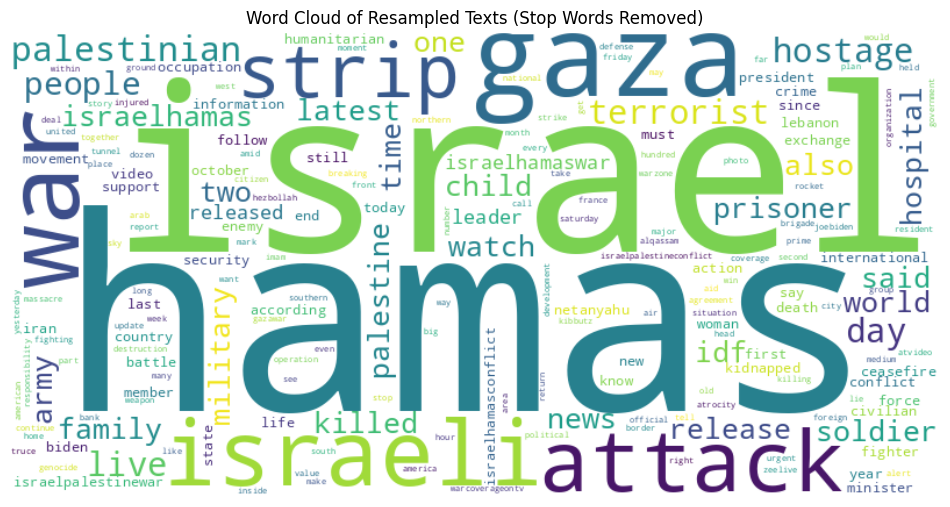

Label Distribution:
Type of Propaganda
propaganda        44.600000
not propaganda    32.422222
unclear           22.007407
not applicable     0.970370
Name: proportion, dtype: float64

Resampled Label Distribution:
Counter({'not applicable': 4817, 'unclear': 4770, 'not propaganda': 4754, 'propaganda': 4733})

Vocabulary Stats:
Total Words: 95569.27393041605
Unique Words: 23229
Vocabulary Richness: 0.24305929138807758
Top 10 Words: [('hamas', 928.4404895907168), ('israel', 834.0339469229611), ('gaza', 794.1277039256983), ('war', 615.6942275518924), ('israeli', 476.538589809344), ('attack', 416.3589062349575), ('strip', 315.2393095175767), ('palestinian', 310.4374278270194), ('hostage', 296.5185949255226), ('terrorist', 296.34600653216495)]
Top 10 Filtered Words: [('hamas', 928.4404895907168), ('israel', 834.0339469229611), ('gaza', 794.1277039256983), ('war', 615.6942275518924), ('israeli', 476.538589809344), ('attack', 416.3589062349575), ('strip', 315.2393095175767), ('palestinian', 3

In [39]:
class PropagandaEDA:
    def __init__(self, df, text_column, label_column):
        self.df = df
        self.text_column = text_column
        self.label_column = label_column
        self.stats = {}  # To store statistics and results
        self.resampled_texts = None  # This will hold the texts after resampling

    def preprocess_data(self):
        """Preprocess the data (e.g., handle missing values, etc.)."""
        # Drop missing values in the text column
        self.df.dropna(subset=[self.text_column], inplace=True)
        return self

    def analyze_labels(self):
        """Analyze label distribution."""
        label_counts = self.df[self.label_column].value_counts(normalize=True) * 100
        self.stats['label_distribution'] = label_counts
        return self

    def analyze_resampled_labels(self, X_res, y_res, vectorizer=None):
        """Analyze resampled labels after balancing."""
        if vectorizer is None:
            raise ValueError("The 'vectorizer' parameter is required to decode feature indices.")

        # Convert sparse matrix to list of strings if necessary
        if isinstance(X_res, csr_matrix):
            feature_names = vectorizer.get_feature_names_out()
            self.resampled_texts = [
                " ".join(feature_names[i] for i in row.indices)
                for row in X_res
            ]
        elif isinstance(X_res, (np.ndarray, list)):
            self.resampled_texts = list(X_res)
        else:
            raise ValueError("X_res should be a list, numpy array, or sparse matrix of text data.")

        self.stats['resampled_label_distribution'] = Counter(y_res)
        return self



    def analyze_vocabulary(self):
        """Analyze vocabulary of the resampled texts with stopwords removed automatically by TfidfVectorizer."""
        if self.resampled_texts is None:
            raise ValueError("Resampled texts not available. Please run analyze_resampled_labels() first.")

        # Combine stopwords from English, Spanish, and French, and convert to a list
        stop_words = list(set(stopwords.words('english')) | set(stopwords.words('spanish')) | set(stopwords.words('french')))

        # Use TfidfVectorizer to process texts and remove stopwords
        vectorizer = TfidfVectorizer(stop_words=stop_words)
        tfidf_matrix = vectorizer.fit_transform(self.resampled_texts)

        # Get the vocabulary and its frequencies
        feature_names = vectorizer.get_feature_names_out()
        word_freq = tfidf_matrix.sum(axis=0).A1  # Convert to dense format to sum over columns
        word_freq = dict(zip(feature_names, word_freq))

        # Sort by frequency
        sorted_word_freq = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)

        # Store vocabulary stats
        self.stats['total_words_resampled'] = sum(word_freq.values())
        self.stats['unique_words_resampled'] = len(word_freq)
        self.stats['vocabulary_richness_resampled'] = len(word_freq) / sum(word_freq.values())
        self.stats['top_words_resampled'] = sorted_word_freq[:10]

        # Step 4: Visualize with WordCloud
        plt.figure(figsize=(12, 8))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Resampled Texts (Stop Words Removed)')
        plt.show()

        # Return top words for analysis
        self.stats['top_filtered_words_resampled'] = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:10]
        return self  # Ensure method chaining

    def generate_report(self):
        """Generate and display the report."""
        print("Label Distribution:")
        print(self.stats.get('label_distribution'))
        print("\nResampled Label Distribution:")
        print(self.stats.get('resampled_label_distribution'))
        print("\nVocabulary Stats:")
        print(f"Total Words: {self.stats.get('total_words_resampled')}")
        print(f"Unique Words: {self.stats.get('unique_words_resampled')}")
        print(f"Vocabulary Richness: {self.stats.get('vocabulary_richness_resampled')}")
        print(f"Top 10 Words: {self.stats.get('top_words_resampled')}")
        print(f"Top 10 Filtered Words: {self.stats.get('top_filtered_words_resampled')}")
        return self


# Initialize the EDA object
eda = PropagandaEDA(df, text_column="Text", label_column="Type of Propaganda")

# Perform EDA steps using the pre-resampled data
eda.preprocess_data() \
   .analyze_labels() \
   .analyze_resampled_labels(X_res, y_res, vectorizer=vectorizer) \
   .analyze_vocabulary() \
   .generate_report()


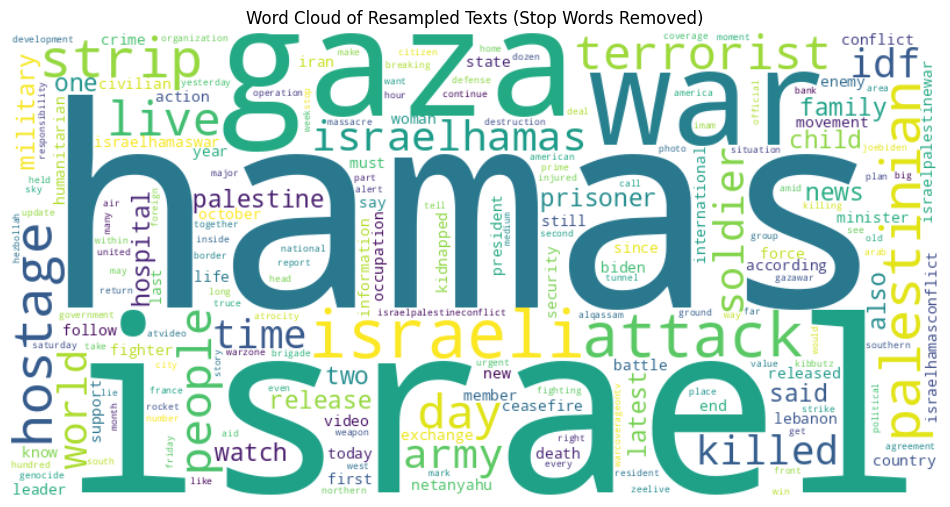

Label Distribution:
Type of Propaganda
propaganda        44.600000
not propaganda    32.422222
unclear           22.007407
not applicable     0.970370
Name: proportion, dtype: float64

Resampled Label Distribution:
Counter({'not applicable': 4817, 'unclear': 4770, 'not propaganda': 4754, 'propaganda': 4733})

Vocabulary Stats:
Total Words: 95569.27393041605
Unique Words: 23229
Vocabulary Richness: 0.24305929138807758
Top 10 Words: [('hamas', 928.4404895907168), ('israel', 834.0339469229611), ('gaza', 794.1277039256983), ('war', 615.6942275518924), ('israeli', 476.538589809344), ('attack', 416.3589062349575), ('strip', 315.2393095175767), ('palestinian', 310.4374278270194), ('hostage', 296.5185949255226), ('terrorist', 296.34600653216495)]
Top 10 Filtered Words: [('hamas', 928.4404895907168), ('israel', 834.0339469229611), ('gaza', 794.1277039256983), ('war', 615.6942275518924), ('israeli', 476.538589809344), ('attack', 416.3589062349575), ('strip', 315.2393095175767), ('palestinian', 3

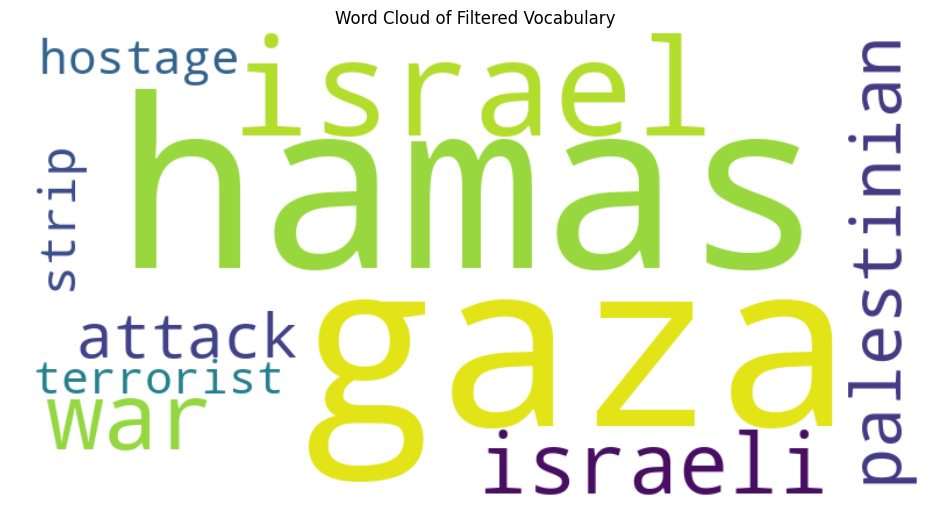

Filtered Word Frequencies: {'attack': 53.612620786984685, 'gaza': 350.640160596205, 'hamas': 360.5372490005517, 'hostage': 29.200485662776092, 'israel': 348.98759467709624, 'israeli': 107.03875461265295, 'palestinian': 68.70923161879931, 'strip': 32.937728908940414, 'terrorist': 27.89077977595854, 'war': 134.08274782188934}


In [40]:
class FeatureEngineering:
    def __init__(self, df, eda_obj, text_column):
        self.df = df
        self.text_column = text_column
        self.eda = eda_obj  # Reference to the EDA object
        self.vectorizer = None  # To store the vectorizer used in EDA

    def filter_keywords(self, word_freq, keywords):
        """Filter words based on the given keywords."""
        filtered_freq = {word: freq for word, freq in word_freq.items() if word in keywords}
        return filtered_freq

    def build_vocabulary(self):
        """Build the vocabulary using the results from EDA."""
        # Retrieve the top filtered words from the EDA object
        top_filtered_words = self.eda.stats.get('top_filtered_words_resampled', [])

        # If no valid top words found, raise an exception
        if not top_filtered_words:
            raise ValueError("No valid keywords found in the EDA results.")

        # Create a list of the words (excluding the frequency for later use)
        filtered_keywords = [word for word, _ in top_filtered_words]

        return filtered_keywords

    def visualize_vocabulary(self, word_freq):
        """Visualize the vocabulary using WordCloud."""
        if not word_freq:
            print("No valid keywords found.")
            return

        # Create the word cloud
        plt.figure(figsize=(12, 8))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Filtered Vocabulary')
        plt.show()

    def perform_feature_engineering(self):
        """Main method to perform feature engineering."""
        # Step 1: Build vocabulary using EDA results
        keywords = self.build_vocabulary()

        # Step 2: Vectorize the text data using TfidfVectorizer (same as EDA process)
        self.vectorizer = TfidfVectorizer(stop_words='english')
        tfidf_matrix = self.vectorizer.fit_transform(self.df[self.text_column])

        # Step 3: Retrieve word frequencies
        feature_names = self.vectorizer.get_feature_names_out()
        word_freq = dict(zip(feature_names, tfidf_matrix.sum(axis=0).A1))

        # Step 4: Filter the words based on the keywords from EDA
        filtered_word_freq = self.filter_keywords(word_freq, keywords)

        # Step 5: Visualize the vocabulary (optional)
        self.visualize_vocabulary(filtered_word_freq)

        return tfidf_matrix, filtered_word_freq

# Initialize the EDA object and perform analysis
eda = PropagandaEDA(df, text_column="Text", label_column="Type of Propaganda")
eda.preprocess_data() \
    .analyze_labels() \
    .analyze_resampled_labels(X_res, y_res, vectorizer=vectorizer) \
    .analyze_vocabulary() \
    .generate_report()

# Initialize the FeatureEngineering class using the EDA object
fe = FeatureEngineering(df, eda_obj=eda, text_column="Text")

# Perform feature engineering using the results from the EDA
X, filtered_word_freq = fe.perform_feature_engineering()

# Display the filtered word frequencies and the top words used in the model
print("Filtered Word Frequencies:", filtered_word_freq)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF Vectorization (You can keep using the same vectorizer if you've already fitted it)
vectorizer = TfidfVectorizer(max_features=2000)

# Assume X_res and y_res are already defined as the resampled data
# If X_res and y_res aren't already created, you need to first apply resampling techniques (e.g., SMOTE, random oversampling) on your data

# Train and Evaluate with resampled data
models = {
    "Logistic Regression": LogisticRegression(max_iter=250),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42)
}

# Train and Evaluate on resampled data
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_res, y_res)  # Training on resampled data
    y_pred = model.predict(X_res)  # Predicting on resampled data (or use a separate test set if available)
    y_proba = model.predict_proba(X_res) if hasattr(model, "predict_proba") else None

    # Metrics
    print(f"{name} Results:")
    print("Accuracy:", accuracy_score(y_res, y_pred))  # Use y_res for evaluation

    if y_proba is not None:
        try:
            # Adjusted for multi-class classification
            print("ROC AUC Score:", roc_auc_score(y_res, y_proba, multi_class='ovr'))  # One-vs-rest for multi-class
        except ValueError as e:
            print(f"Error calculating ROC AUC: {e}")
    else:
        print("ROC AUC Score: N/A")

    print(classification_report(y_res, y_pred))  # Use y_res for evaluation



Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.9658697703680402
ROC AUC Score: 0.9961483532433235
                precision    recall  f1-score   support

not applicable       0.99      0.96      0.98      4817
not propaganda       0.95      0.97      0.96      4754
    propaganda       0.95      0.96      0.95      4733
       unclear       0.98      0.98      0.98      4770

      accuracy                           0.97     19074
     macro avg       0.97      0.97      0.97     19074
  weighted avg       0.97      0.97      0.97     19074


Training Naive Bayes...
Naive Bayes Results:
Accuracy: 0.961361014994233
ROC AUC Score: 0.9910025486289633
                precision    recall  f1-score   support

not applicable       0.96      1.00      0.98      4817
not propaganda       0.95      0.96      0.95      4754
    propaganda       0.98      0.92      0.95      4733
       unclear       0.95      0.97      0.96      4770

      accuracy                    

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Bidirectional, Dense, Dropout, Attention, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.utils import to_categorical
from keras_self_attention import SeqSelfAttention

# Step 1: Data Preprocessing
# Assuming 'y_res' is your target labels and 'X_res' is your sparse matrix

# Convert categorical labels into numeric format using LabelEncoder
label_encoder = LabelEncoder()
y_res_encoded = label_encoder.fit_transform(y_res)  # Converts labels to integers
y_res_encoded = to_categorical(y_res_encoded)  # Apply one-hot encoding

# Convert sparse matrix rows to text for tokenization
X_res_text = [' '.join(map(str, X_res.getrow(i).indices)) for i in range(X_res.shape[0])]

# Tokenization parameters
max_features = 10000  # Increase vocabulary size
max_length = 100  # Sequence length

# Initialize and fit the tokenizer with OOV token
tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")  # Add oov_token
tokenizer.fit_on_texts(X_res_text)  # Tokenize sparse matrix row data as text

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_res_text)

# Pad sequences for uniform input length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')

# Compute class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y_res_encoded, axis=1)), y=np.argmax(y_res_encoded, axis=1))

# Convert class_weights to a dictionary
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Step 2: Load GloVe Embeddings
def load_glove_embeddings(file_path, embedding_dim=100):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Pre-trained GloVe embeddings (replace this path with your actual GloVe file path)
embeddings_index = load_glove_embeddings('/content/glove.6B.100d.txt')

# Prepare an embedding matrix (use only words in our training set)
embedding_matrix = np.random.normal(0, 0.05, (max_features, 100))  # Initialize with random values
for word, i in tokenizer.word_index.items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
        else:
            # If word not in GloVe, initialize with random values
            embedding_matrix[i] = np.random.normal(0, 0.05, (100,))

# Step 3: Define the Model Architecture (Including Attention)
def build_lstm_with_attention():
    model = Sequential([
        Embedding(input_dim=max_features, output_dim=100, input_length=max_length,
                  weights=[embedding_matrix], trainable=True),
        SpatialDropout1D(0.4),  # Increased dropout for regularization
        Bidirectional(LSTM(128, dropout=0.4, recurrent_dropout=0.4, return_sequences=True)),  # Set return_sequences=True
        SeqSelfAttention(attention_activation='sigmoid'),  # Use SeqSelfAttention layer for self-attention
        GlobalMaxPooling1D(),  # Add GlobalMaxPooling1D to reduce dimensionality
        Dense(128, activation='relu'),
        Dropout(0.5),  # Dropout after dense layer for regularization
        Dense(y_res_encoded.shape[1], activation='softmax')  # Output layer, softmax for multi-class classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Callbacks for Training
# EarlyStopping to stop training if the validation loss does not improve
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# ReduceLROnPlateau to reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# Step 5: Train the Model
lstm_model = build_lstm_with_attention()

history = lstm_model.fit(
    X_train_padded, y_res_encoded,
    epochs=20, batch_size=32, validation_split=0.1,
    class_weight=class_weight_dict,  # Apply class weights
    callbacks=[early_stopping, reduce_lr]
)

# Step 6: Evaluate the Model
# Make predictions
y_pred = lstm_model.predict(X_train_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(np.argmax(y_res_encoded, axis=1), y_pred_classes))

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_res_encoded, y_pred, multi_class='ovr'))


Epoch 1/20
539/539 [==============================] - 354s 646ms/step - loss: 1.2823 - accuracy: 0.3597 - val_loss: 1.2270 - val_accuracy: 0.3673 - lr: 1.0000e-04
Epoch 2/20
539/539 [==============================] - 345s 640ms/step - loss: 1.0990 - accuracy: 0.4366 - val_loss: 1.1419 - val_accuracy: 0.2905 - lr: 1.0000e-04
Epoch 3/20
539/539 [==============================] - 344s 638ms/step - loss: 1.0535 - accuracy: 0.4492 - val_loss: 1.0759 - val_accuracy: 0.4154 - lr: 1.0000e-04
Epoch 4/20
476/539 [=========================>....] - ETA: 39s - loss: 1.0289 - accuracy: 0.4535